# Grappa Student Seminar
### Weekly programming assignments - Week 1
#### Dylan van Arneman, Gijs Leguijt, Sven Poelmann, Yoran Yeh

[Github link](https://github.com/adam-coogan/GRAPPA_Student_Seminar_2019)

Support $\LaTeX$

$H(T_{fo})=\Gamma(T_{fo}) = v(T_{fo})n(T_{fo})\sigma(T_{fo})$

## Imports

In [98]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.constants import *
from scipy.optimize import root
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
%matplotlib inline

## Units & Constants

We used natural units, $c = \hbar = k_B = 1$, the following constants are used to convert units.

In [99]:
"""Units____________________________________________________"""
eV = 1                                           #electron volt

J = eV / e                                               #Joule
s = 1 / (hbar * J)                                      #second
m = s / c                                                #meter
kg = J * c**(2)                                     #kilograms
K = J * k                                               #Kelvin

"""Constants________________________________________________""" 

G = value("Newtonian constant of gravitation") * (m**3 / (kg * s**2))                   #Newton constant
M_pl = value('Planck mass') * kg                   #Planck mass
GeV = 1.0e9 * eV                            #Giga electron volt
MeV = 1.0e6 * eV
G_f = value('Fermi coupling constant') * GeV**-2     #Fermi constant
T_CMB = 2.725 * K
Mpc = 3.085e22 * m
H = 67.8e3 * (m / s) / Mpc
h_hub = H / (1.0e5 * (m / s) / Mpc)
rho_c = 1.9e-26 * h_hub**2 * kg / m**3
zheta_3 = 1.202

In [100]:
constants = np.array([eV,J,s,m,kg,K,G,M_pl,GeV,MeV,G_f,T_CMB,Mpc,H,h_hub,rho_c,zheta_3])
names = np.array(['eV','J','s','m','kg','K','G','M_pl','GeV','MeV','G_f','T_CMB','Mpc','H','h_hub','rho_c','zheta_3'])
def last_resort(name=0,value=0):
    """print alle constantes en je kan ze toevoegen, deze blijven er dan in, zie voorbeeld"""
    global constants
    global names
    if name != 0 or value !=0:
        constants = np.append(constants,value)
        names = np.append(names,name)
    for i in range(len(constants)):
        print(names[i]+' is %s eV' %constants[i])

print('noodgeval met iets')
last_resort('penis',0.3*m)
print('\n')
print('noodgeval zonder iets')
last_resort()


noodgeval met iets
eV is 1.0 eV
J is 6.241509125883258e+18 eV
s is 1519267460583196.5 eV
m is 5067730.758534281 eV
kg is 5.6095886500206855e+35 eV
K is 8.617330337217213e-05 eV
G is 6.708609608848652e-57 eV
M_pl is 1.2209101409110522e+28 eV
GeV is 1000000000.0 eV
MeV is 1000000.0 eV
G_f is 1.1663787e-23 eV
T_CMB is 0.00023482225168916905 eV
Mpc is 1.5633949390078256e+29 eV
H is 1.4465727814615567e-33 eV
h_hub is 0.678 eV
rho_c is 3.76446621904458e-11 eV
zheta_3 is 1.202 eV
penis is 1520319.227560284 eV


noodgeval zonder iets
eV is 1.0 eV
J is 6.241509125883258e+18 eV
s is 1519267460583196.5 eV
m is 5067730.758534281 eV
kg is 5.6095886500206855e+35 eV
K is 8.617330337217213e-05 eV
G is 6.708609608848652e-57 eV
M_pl is 1.2209101409110522e+28 eV
GeV is 1000000000.0 eV
MeV is 1000000.0 eV
G_f is 1.1663787e-23 eV
T_CMB is 0.00023482225168916905 eV
Mpc is 1.5633949390078256e+29 eV
H is 1.4465727814615567e-33 eV
h_hub is 0.678 eV
rho_c is 3.76446621904458e-11 eV
zheta_3 is 1.202 eV
penis is 

## Code

$n \sim \frac{m^3}{x^{3/2}} e^{-x}$ and we know $H(T_{fo}) \sim \frac{T^2_{fo}}{M_{pl}}$

$H \sim n\sigma v \Rightarrow \frac{T^2_{fo}}{M_{pl}} = \frac{m^3}{x^{3/2}} e^{-x} \sigma$

$\frac{m^3}{x^{3/2}_0} e^{-x_0} = \frac{T_{fo}^2}{M_{pl}\sigma} = \frac{m^2}{x^{2}_0 M_{pl} \sigma} $

### Hot Dark Matter

In the hot dark matter (HDM) case we have the following particle number density:

$n(T_{fo}) = \frac{\zeta(3)}{\pi^2} g^\star T_{fo}^3$, where $g^\star$ is the number of degrees of freedom of the DM particle. Note that this equation only holds for equilibrium. To calculate the DM abundance today, we have to redshift this particle density to the current time.

Use $n(T_0) = n(T_{fo}) \frac{s_0}{s_{fo}}$. We take $ \frac{s_0}{s_{fo}} = \frac{g_s^\star(T_0) \cdot (T_0)^3}{g_s^\star(T_{fo}) \cdot (T_{fo})^3} \xrightarrow{} n(T_0) = n(T_{fo}) \frac{g_s^\star(T_0)\cdot (T_0)^3}{g_s^\star(T_{fo})\cdot(T_{fo})^3}$. Here. $g_s^\star$ is related to the entropy of the plasma and should not be confused with the degrees of freedom of the DM particle.

Now to find $T_{fo}$: use the Friedmann equation and the freeze-out condition to find the freeze-out temperature. 

The freeze-out condition:
$n(T_{fo}) \sigma = H =  \left(\frac{8 \pi G}{3}\right)^3 \rho^{1/2}$. During radiation domination the energy density is $\rho = \frac{\pi^2}{30} g^\star(T) T^4$. If we fill this in and solve for the temperature (analytically), we find: 

$ T_{fo}^3 = \sqrt{\frac{4}{45} \frac{G \pi^7}{g^\star(T_{fo})}} \frac{1}{\zeta(3) G_F^2}$.

Now we fill in this expression for $T_{fo}$ into the expression for $n(T_{fo})$, and redshift this accordingly. 

Finally, to determine the abundance we use $ \Omega_{HDM} = \frac{m n(T_0)}{\rho_{crit}}$, and fill in $n(T_0)$ as determined above. Where we model sigma to be $\sigma = G_F^2 T_{fo}^2$.

N.B.: when we did the math it turned out $T_{fo}$ dropped out, however to keep the method between cold and hot dark matter consistent, we calculated $T_{fo}$ anyway.

In [101]:
g_s_T0 = 3.94
g_s_Tfo = 4 #106.75
g_dof = 2   #of 3/4
dof = 1

In [102]:
def fo(g_dof,G_f):
    """Calculates freeze out temperature"""
    T_fo = (np.sqrt((4.0/45) * (G*(np.pi**7) /(g_dof))) * 1/(zheta_3 * G_f**2))**(1.0/3)
    return T_fo

def nd_hdm(g_dof,T_fo):
    """Calculates number density"""
    n_hdm = (zheta_3* g_dof*T_fo**3 )/np.pi**2
    return n_hdm

def abun(n_fo,mass):
    """Calculates abundancy"""
    n_0 = n_fo*(g_s_T0 * T_CMB**3)/(g_s_Tfo * T_fo**3)
    Omega_hdm = mass * n_0 / rho_c 
    return Omega_hdm

In [103]:
mass = np.linspace(1.0e-2,1.0e2,500)
T_fo = fo(g_dof,G_f)
n_fo = nd_hdm(g_dof,T_fo)
omega_hdm = abun(n_fo,mass)

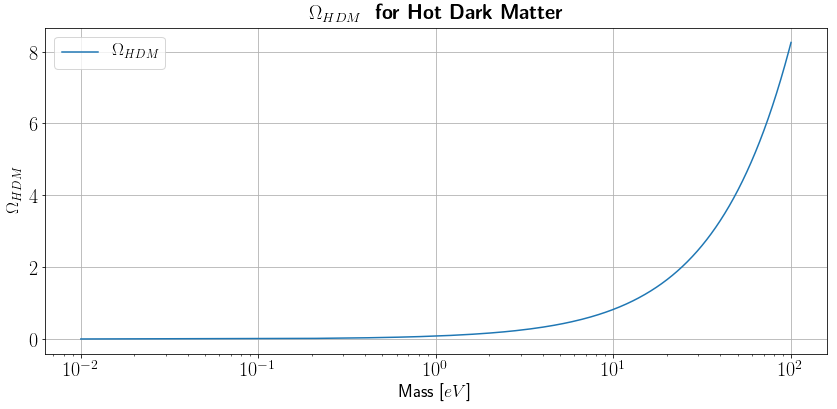

In [104]:
plt.figure(1,figsize=(14, 6))

plt.semilogx(mass,omega_hdm,label = r'$\Omega_{HDM}$')
plt.ylabel(r'$\Omega_{HDM}$ ',fontsize=18)
plt.xlabel(r'Mass [$eV$]',fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'$\Omega_{HDM}$ \textbf{ for Hot Dark Matter}',fontsize=20)
plt.grid(True)

plt.legend(prop=dict(size=18))
plt.show()

### Cold Dark Matter

The cold dark matter (CDM) case is very similar to the HDM case (see above), except that the particle density is now given by a different expression. 

$n_{CDM}(T) = g^\star\left( \frac{m T}{2 \pi} \right)^{3/2} e^{-m/T}$. Now solving the Hubble equation for $T_{fo}$ cannot be done analytically, so we solve it numerically. For a non relativistic particle we take $\frac{1}{3}c n(T) \sigma = \sqrt{\frac{8 \pi G}{3}}\rho^{1/2}$. Same as before, we take the radiation dominated energy density and model the cross section as $\sigma = G_F^2 T^2$.


Now that we have $T_{fo}$, we fill this into $n(T_{fo})$, redshift this to $n(T_0)$ and finally fill into $\Omega_{CDM} = \frac{m n(T_0)}{\rho_c}$

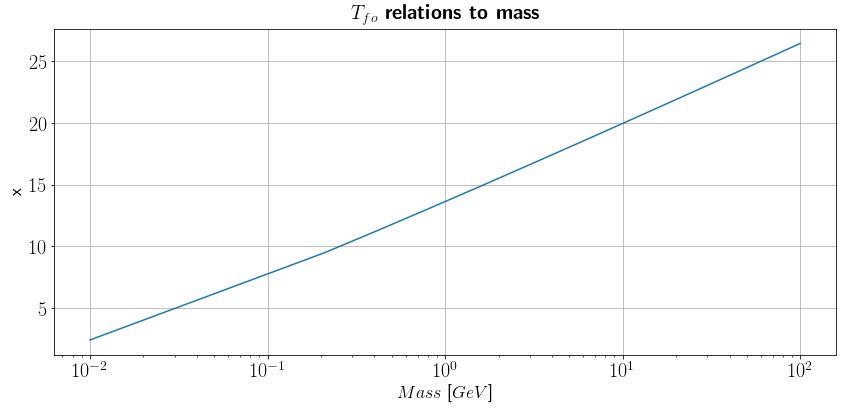

In [105]:
def func3(T,mass):
    mass *= GeV
    func3 = np.sqrt(g_s_T0) * G_f**2  *np.exp(-mass/T) - np.sqrt(32*G/5)*(np.pi**3) *(mass*T)**(-3/2)
    return func3

def cal_Tcdm(mass):
    T_cdm = root(func3,T_fo,args = (mass))
    return T_cdm

x_l = []
for i in mass:
    T_cdm = cal_Tcdm(i)
    x_l.append(i*GeV/T_cdm['x'])

plt.figure(1,figsize=(14, 6))
plt.semilogx(mass, x_l)
plt.xlabel(r'$Mass$ [$GeV$] ',fontsize=18)
plt.ylabel(r'x',fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'\textbf{ $T_{fo}$ relations to mass}',fontsize=20)
plt.grid(True)

# plt.legend(prop=dict(size=18))
plt.show()

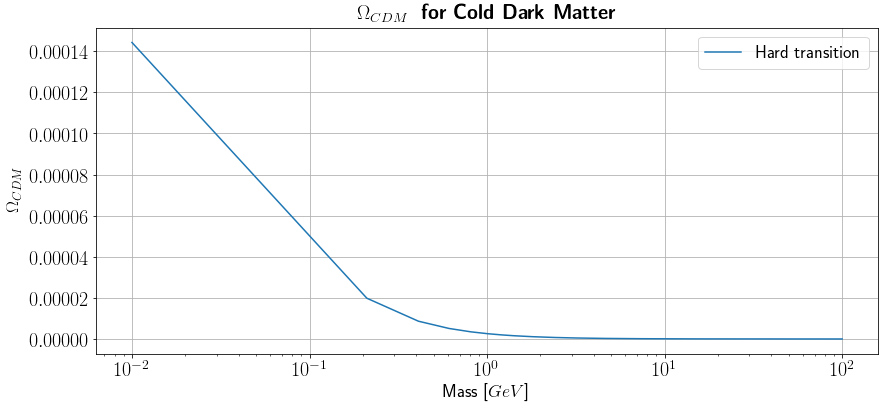

In [106]:
def func3(T,mass):
    mass *= GeV
    func3 = np.sqrt(g_s_T0) * G_f**2  *np.exp(-mass/T) - np.sqrt(32*G/5)*(np.pi**3) *(mass*T)**(-3/2)
    return func3

def cal_Tcdm(mass):
    T_cdm = root(func3,T_fo,args = (mass))
    return T_cdm

def nd_cdm(m,T,g):
    m *= GeV
    n_cdm = g*(m*T/(2*np.pi))**(3/2) *np.exp(-m/T)
    return n_cdm

def ab_cdm(m,n,T_fo):
    n_0 = n*(g_s_T0 * T_CMB**3)/(g_s_Tfo * T_fo**3)
    return m*n_0/rho_c

omega_l = []

for i in mass:
    T_cdm = cal_Tcdm(i)
    n_cdm = nd_cdm(i,T_cdm['x'],g_dof)
    omega_cdm = ab_cdm(i,n_cdm,T_cdm['x'])
    omega_l.append(omega_cdm)

plt.figure(1,figsize=(14, 6))
plt.semilogx(mass, omega_l,label = 'Hard transition')

plt.xlabel(r'Mass [$GeV$]',fontsize=18)
plt.ylabel(r'$\Omega_{CDM}$',fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'$\Omega_{CDM}$ \textbf{ for Cold Dark Matter}',fontsize=20)
plt.grid(True)

plt.legend(prop=dict(size=18))
plt.show()

### Continue

In [107]:
from numpy import genfromtxt
from scipy.interpolate import interp1d
my_data = genfromtxt('data.csv', delimiter=',')

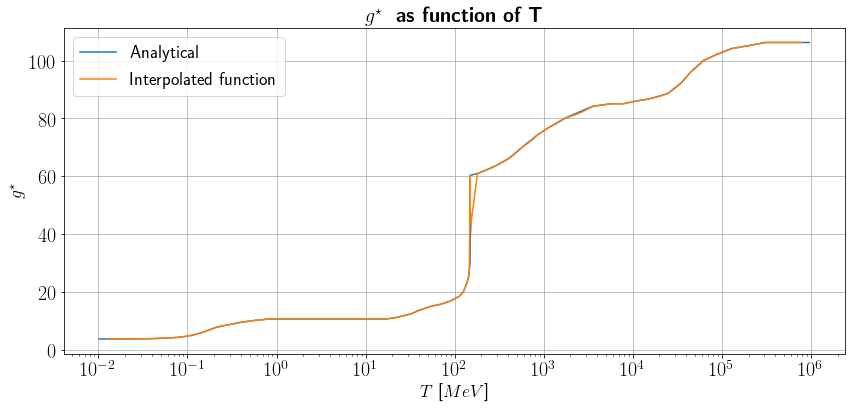

In [108]:
x = my_data[:,0]
y = my_data[:,1]
g = interp1d(x,y)
T = np.logspace(-1.9,5.9,10e6)

plt.figure(1,figsize=(14, 6))
plt.semilogx(my_data[:,0],my_data[:,1],label = "Analytical")
plt.semilogx(T,g(T),label = 'Interpolated function')
plt.ylabel(r'$g^\star$',fontsize=18)
plt.xlabel(r'$T$ [$MeV$]',fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'$g^\star$ \textbf{ as function of T} ',fontsize=20)
plt.legend(prop=dict(size=18))
plt.grid(True)

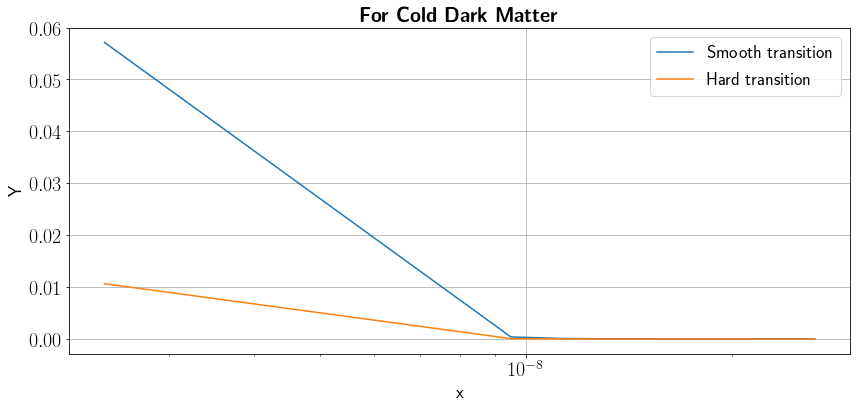

In [109]:
def nd_cdm(m,T,g):
    m *= GeV
    n_cdm = g*(m*T/(2*np.pi))**(3/2) *np.exp(-m/T)
    return n_cdm

def Y_cdm(m,n,T_fo):
    Y = n/(g_s_Tfo * T_fo**3)
    return Y

Y_l, x_l = [],[]
Y_c = []

for i in mass:
    #abrupt
    T_cdm = cal_Tcdm(i)
    n_cdm = nd_cdm(i,T_cdm['x'],g_dof)
    Y = Y_cdm(i,n_cdm,T_cdm['x'])
    
    #continues
    n_c = nd_cdm(i,T_cdm['x'],g(T_cdm['x'][0]/MeV))
    Yc = Y_cdm(i,n_c,T_cdm['x'])
    
    Y_l.append(Y)
    Y_c.append(Yc)
    x_l.append(i/T_cdm['x'][0])
    

plt.figure(1,figsize=(14, 6))
plt.semilogx(x_l, Y_c,label = 'Smooth transition')
plt.semilogx(x_l, Y_l,label = 'Hard transition')
               
plt.xlabel(r'x',fontsize=18)
plt.ylabel(r'Y',fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'\textbf{For Cold Dark Matter}',fontsize=20)
plt.grid(True)

plt.legend(prop=dict(size=18))
plt.show()

## Andere manier

$\Omega_{DM} = 0.2 \frac{x_{fo}}{20} (\frac{10^{-8} GeV^{-2}}{\sigma})$

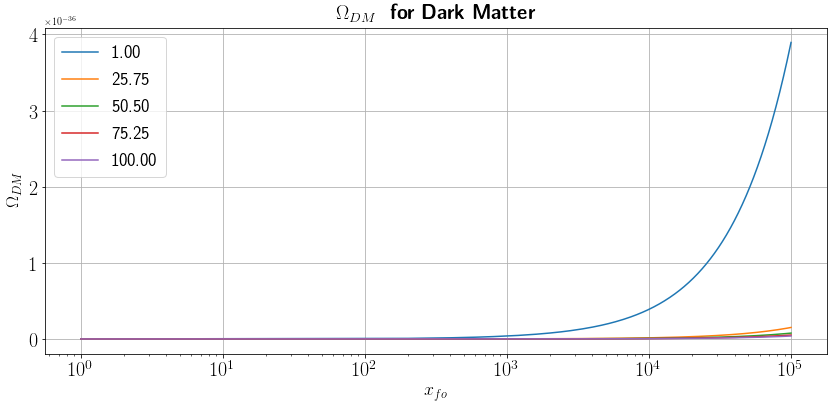

In [37]:
x_fo = np.linspace(10e-1,10e4,500)
sigma = np.linspace(1,100,5)
plt.figure(1,figsize=(14, 6))
for i in sigma:
    omega_dm = 10e-10 *x_fo*GeV**(-2)/(i*m**2)
    plt.semilogx(x_fo,omega_dm,label= "%.2f"%i)
plt.ylabel(r'$\Omega_{DM}$',fontsize=18)
plt.xlabel(r'$x_{fo}$',fontsize=18)

plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(r'$\Omega_{DM}$ \textbf{ for Dark Matter}',fontsize=20)
plt.grid(True)

plt.legend(prop=dict(size=18))
plt.show()